In [1]:
import pandas as pd
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt

# Defining functions

In [2]:
def normalise(x, ok, p):
    m = len(x)
    x = x.reshape(x.shape[0], 1)
    temp = x
    mean = x.mean()
    std = np.std(x)
    x = (x - mean) / std
    if ok:
        for i in range(2, p):
            te = temp ** i
            mean = te.mean()
            std = np.std(te)
            te = (te - mean) / std
            x = np.append(x, te, axis = 1)
        x = np.append(np.ones((m, 1)), x, axis = 1)
    return x

In [3]:
def cost(x, y, theta, lamda):
    h = x @ theta
    cost = np.sum((h - y) ** 2)
    cost += lamda * np.sum(theta ** 2)
    cost /= (2 * len(x))
    return cost

In [4]:
def gradient(x, y, theta, lamda):
    reg = lamda * theta
    reg[0] = 0
    return (x.T @ (x @ theta - y) + reg)

In [5]:
def train(x, y, theta, l_rate, epochs, lamda):
    for epoch in range(1, epochs+1):
        theta -= l_rate * gradient(x, y, theta, lamda) / len(x)
        if epoch % 100 == 0:
            print("Epoch " + str(epoch) + ": " + str(cost(x, y, theta, lamda)))
    return theta

# Loading and normalising data

In [6]:
data = spio.loadmat('ex5data1.mat')

In [7]:
df = data['X']
te = data['Xtest']
df = np.append(df, te)
te = data['Xval']
df = np.append(df, te)
df.shape

(54,)

In [8]:
fd = data['y']
te = data['ytest']
fd = np.append(fd, te)
te = data['yval']
fd = np.append(fd, te)
fd.shape

(54,)

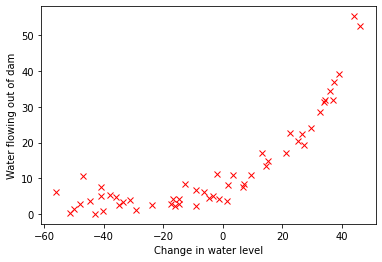

In [9]:
plt.plot(df, fd, 'rx')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of dam')
plt.show()

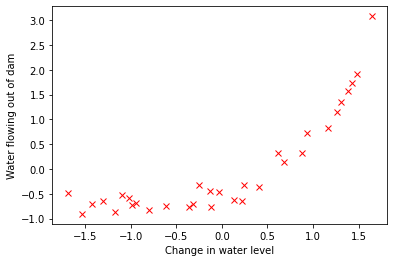

In [10]:
x_train = normalise(df[:32], True, 2)
y_train = normalise(fd[:32], False, 2)
x_crosv = normalise(df[32:43], True, 2)
y_crosv = normalise(fd[32:43], False, 2)
x_test  = normalise(df[43:], True, 2)
y_test  = normalise(fd[43:], False, 2)
plt.plot(x_train[:, -1], y_train, 'rx')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of dam')
plt.show()

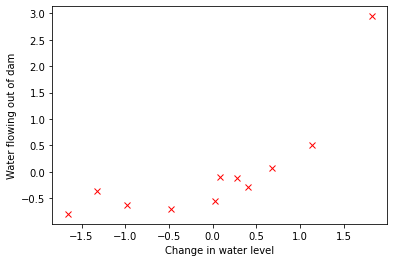

In [11]:
plt.plot(x_test[:,-1], y_test, 'rx')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of dam')
plt.show()

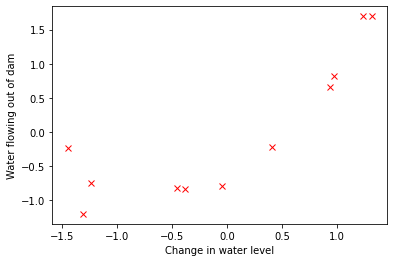

In [12]:
plt.plot(x_crosv[:,-1], y_crosv, 'rx')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of dam')
plt.show()

# Hyperparameters

In [13]:
theta = np.random.rand(2, 1)
l_rate = 0.01
epochs = 1000
theta =  train(x_train, y_train, theta, l_rate, epochs, 0)

Epoch 100: 0.18097709446531318
Epoch 200: 0.1500240334877704
Epoch 300: 0.1458769524421406
Epoch 400: 0.1453213278720375
Epoch 500: 0.14524688547279196
Epoch 600: 0.14523691170434538
Epoch 700: 0.14523557542209184
Epoch 800: 0.14523539638743
Epoch 900: 0.14523537240042422
Epoch 1000: 0.14523536918665297


In [14]:
theta

array([[3.15220113e-05],
       [8.42334733e-01]])

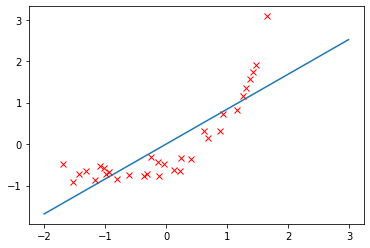

In [15]:
x_range = np.arange(-2, 3, 0.01)
y = x_range * theta[1] + theta[0]
plt.plot(x_range, y)
plt.plot(x_train[:,-1], y_train, 'rx')
plt.show()


# Polynomial Regression

In [59]:
p = 3
x_train = normalise(df[:32], True, p)
y_train = normalise(fd[:32], False, p)
x_crosv = normalise(df[32:43], True, p)
y_crosv = normalise(fd[32:43], False, p)
x_test  = normalise(df[43:], True, p)
y_test  = normalise(fd[43:], False, p)

In [60]:
theta = np.random.rand(p, 1)
l_rate = 0.01
epochs = 4000
lamda = 0
theta = train(x_train, y_train, theta, l_rate, epochs, lamda)

Epoch 100: 0.0647889222053319
Epoch 200: 0.03154676447516619
Epoch 300: 0.02704592466146994
Epoch 400: 0.026430373771325177
Epoch 500: 0.02634456966494087
Epoch 600: 0.026332187362809904
Epoch 700: 0.026330292704972225
Epoch 800: 0.026329976188639352
Epoch 900: 0.02632991711697929
Epoch 1000: 0.0263299047711791
Epoch 1100: 0.026329901938731005
Epoch 1200: 0.026329901245900064
Epoch 1300: 0.026329901069753824
Epoch 1400: 0.026329901023997765
Epoch 1500: 0.026329901011975826
Epoch 1600: 0.026329901008798506
Epoch 1700: 0.026329901007956215
Epoch 1800: 0.026329901007732595
Epoch 1900: 0.02632990100767318
Epoch 2000: 0.026329901007657384
Epoch 2100: 0.026329901007653186
Epoch 2200: 0.026329901007652062
Epoch 2300: 0.026329901007651778
Epoch 2400: 0.026329901007651688
Epoch 2500: 0.026329901007651674
Epoch 2600: 0.026329901007651663
Epoch 2700: 0.02632990100765166
Epoch 2800: 0.02632990100765166
Epoch 2900: 0.02632990100765167
Epoch 3000: 0.026329901007651667
Epoch 3100: 0.02632990100765166

In [61]:
theta

array([[-7.40524432e-17],
       [ 1.01858040e+00],
       [ 5.18529812e-01]])

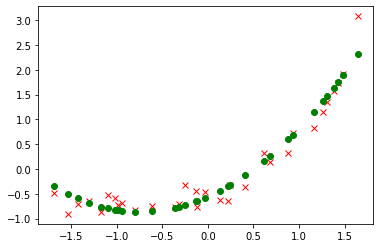

In [62]:
plt.plot(x_train[:, 1], y_train, 'rx')
h = x_train @ theta
plt.plot(x_train[:, 1], h, 'ro', color = 'g')
plt.show()

In [63]:
cost(x_train, y_train, theta, lamda)

0.026329901007651663

In [65]:
cost(x_crosv, y_crosv, theta, lamda)

0.02119167855292908

In [66]:
cost(x_test, y_test, theta, lamda)

0.04725867566179284

# Learning curve

In [67]:
error_train = []
error_crosv = []
for i in range(1, len(x_train)+1):
    x = x_train[:i, :]
    y = y_train[:i]
    param = np.random.rand(p, 1)
    param = train(x, y, param, l_rate, epochs, lamda)
    error_train.append(cost(x, y, param, 0))
    error_crosv.append(cost(x_crosv, y_crosv, param, 0))

Epoch 100: 0.031058197148397273
Epoch 200: 0.0008565640857237497
Epoch 300: 2.3623458549318668e-05
Epoch 400: 6.515190201560131e-07
Epoch 500: 1.7968454226907016e-08
Epoch 600: 4.955578230465006e-10
Epoch 700: 1.366714982254919e-11
Epoch 800: 3.769307548998629e-13
Epoch 900: 1.0395495494609158e-14
Epoch 1000: 2.867007355111125e-16
Epoch 1100: 7.907012161791138e-18
Epoch 1200: 2.180700637741622e-19
Epoch 1300: 6.014198360831749e-21
Epoch 1400: 1.6586857430856256e-22
Epoch 1500: 4.57471547701584e-24
Epoch 1600: 1.2624656291030574e-25
Epoch 1700: 3.475924526605905e-27
Epoch 1800: 9.940263703366953e-29
Epoch 1900: 6.310887241768095e-30
Epoch 2000: 8.874685183736383e-31
Epoch 2100: 1.5407439555097887e-31
Epoch 2200: 5.546678239835239e-32
Epoch 2300: 5.546678239835239e-32
Epoch 2400: 5.546678239835239e-32
Epoch 2500: 5.546678239835239e-32
Epoch 2600: 5.546678239835239e-32
Epoch 2700: 5.546678239835239e-32
Epoch 2800: 5.546678239835239e-32
Epoch 2900: 5.546678239835239e-32
Epoch 3000: 5.54667

Epoch 3100: 0.004981264038891836
Epoch 3200: 0.004981264038891798
Epoch 3300: 0.004981264038891784
Epoch 3400: 0.004981264038891783
Epoch 3500: 0.004981264038891783
Epoch 3600: 0.00498126403889178
Epoch 3700: 0.00498126403889178
Epoch 3800: 0.0049812640388917796
Epoch 3900: 0.004981264038891783
Epoch 4000: 0.004981264038891777
Epoch 100: 0.05846589143018499
Epoch 200: 0.011575277377958703
Epoch 300: 0.006284902044723856
Epoch 400: 0.005525834286937272
Epoch 500: 0.005373109471637838
Epoch 600: 0.005331847642666694
Epoch 700: 0.005318731098960459
Epoch 800: 0.00531426840153633
Epoch 900: 0.0053127108906132975
Epoch 1000: 0.005312162217579512
Epoch 1100: 0.005311968268278706
Epoch 1200: 0.005311899621637583
Epoch 1300: 0.005311875313030029
Epoch 1400: 0.005311866703478857
Epoch 1500: 0.005311863653959884
Epoch 1600: 0.005311862573785663
Epoch 1700: 0.005311862191171757
Epoch 1800: 0.005311862055643646
Epoch 1900: 0.005311862007637291
Epoch 2000: 0.005311861990632614
Epoch 2100: 0.0053118

Epoch 3000: 0.01357784165944547
Epoch 3100: 0.013577841657507679
Epoch 3200: 0.013577841656635926
Epoch 3300: 0.013577841656243754
Epoch 3400: 0.013577841656067327
Epoch 3500: 0.013577841655987959
Epoch 3600: 0.013577841655952258
Epoch 3700: 0.013577841655936194
Epoch 3800: 0.013577841655928964
Epoch 3900: 0.013577841655925717
Epoch 4000: 0.013577841655924253
Epoch 100: 0.08894728842514185
Epoch 200: 0.039686490003713035
Epoch 300: 0.02420008202437938
Epoch 400: 0.017959012911510114
Epoch 500: 0.015230339735545662
Epoch 600: 0.0140075070990913
Epoch 700: 0.01345540185343285
Epoch 800: 0.013205561991143196
Epoch 900: 0.013092425571514741
Epoch 1000: 0.013041182493039255
Epoch 1100: 0.013017971367169305
Epoch 1200: 0.013007457418603737
Epoch 1300: 0.013002694884041814
Epoch 1400: 0.013000537580555305
Epoch 1500: 0.012999560377987556
Epoch 1600: 0.01299911773047303
Epoch 1700: 0.01299891722257513
Epoch 1800: 0.012998826397671652
Epoch 1900: 0.012998785256333974
Epoch 2000: 0.0129987666203

Epoch 2900: 0.027246908462029488
Epoch 3000: 0.02724690846202949
Epoch 3100: 0.027246908462029484
Epoch 3200: 0.0272469084620295
Epoch 3300: 0.027246908462029505
Epoch 3400: 0.027246908462029498
Epoch 3500: 0.027246908462029505
Epoch 3600: 0.0272469084620295
Epoch 3700: 0.027246908462029498
Epoch 3800: 0.02724690846202951
Epoch 3900: 0.02724690846202949
Epoch 4000: 0.0272469084620295
Epoch 100: 0.0674848199267156
Epoch 200: 0.0339016550448319
Epoch 300: 0.02780338256942192
Epoch 400: 0.02658986363886822
Epoch 500: 0.02632946969290789
Epoch 600: 0.026270337673760483
Epoch 700: 0.026256370939028915
Epoch 800: 0.026252986158386542
Epoch 900: 0.026252152542724047
Epoch 1000: 0.026251945207219875
Epoch 1100: 0.02625189333366325
Epoch 1200: 0.02625188030973002
Epoch 1300: 0.026251877033018487
Epoch 1400: 0.026251876207619738
Epoch 1500: 0.02625187599955411
Epoch 1600: 0.0262518759470831
Epoch 1700: 0.026251875933847466
Epoch 1800: 0.02625187593050832
Epoch 1900: 0.026251875929665842
Epoch 20

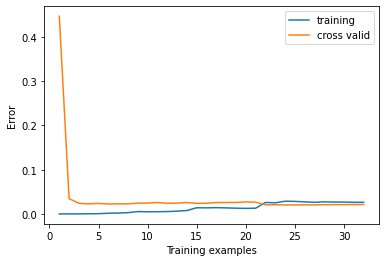

In [68]:
x = np.arange(1, len(x_train)+1, 1)
plt.plot(x, error_train)
plt.plot(x, error_crosv)
plt.xlabel('Training examples')
plt.ylabel('Error')
plt.legend(['training', 'cross valid'])
plt.show()